## 1. Import Libraries & Setup

In [ ]:
        {
            "cell_type": "code",
            "id": "#VSC-b04fdd9e",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# Create scatter plot for both algorithms",
                "# Use `rules` (prepared earlier) which contains 'antecedents_str' and 'consequents_str'",
                "",
                "fig, ax = plt.subplots(figsize=(14, 8))",
                "",
                "# Plot rules using the prepared `rules` DataFrame",
                "scatter = ax.scatter(rules['support'], rules['confidence'],",
                "                     s=rules['lift']*50,  # Size = Lift",
                "                     c=rules['lift'],        # Color = Lift",
                "                     cmap='YlOrRd', alpha=0.6, edgecolors='darkred', linewidth=1.0,",
                "                     label='Rules', zorder=2)",
                "",
                "# Add labels to interesting points (high lift)",
                "high_lift_rules = rules[rules['lift'] > rules['lift'].quantile(0.85)]",
                "for idx, rule in high_lift_rules.head(8).iterrows():",
                "    antecedent = rule.get('antecedents_str', ', '.join(list(rule.get('antecedents', []))))",
                "    consequent = rule.get('consequents_str', ', '.join(list(rule.get('consequents', []))))",
                "    label = f\"{antecedent[:15]}→{consequent[:15]}\"",
                "    ax.annotate(label, ",
                "               (rule['support'], rule['confidence']),",
                "               xytext=(5, 5), textcoords='offset points',",
                "               fontsize=8, alpha=0.8,",
                "               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))",
                "",
                "# Add quadrant lines using medians from `rules`",
                "ax.axhline(y=rules['confidence'].median(), color='gray', linestyle='--', alpha=0.5, linewidth=1)",
                "ax.axvline(x=rules['support'].median(), color='gray', linestyle='--', alpha=0.5, linewidth=1)",
                "",
                "# Quadrant labels",
                "ax.text(rules['support'].max()*0.9, rules['confidence'].max()*0.95, ",
                "       'Phổ biến\\n& Tin cậy', fontsize=10, ha='right', color='green', fontweight='bold',",
                "       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))",
                "ax.text(rules['support'].min()*1.1, rules['confidence'].max()*0.95, ",
                "       'Hiếm nhưng\\nChắc chắn', fontsize=10, ha='left', color='blue', fontweight='bold',",
                "       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))",
                "",
                "# Labels and title",
                "ax.set_xlabel('Support (Độ Phổ Biến)', fontsize=12, fontweight='bold')",
                "ax.set_ylabel('Confidence (Độ Tin Cậy)', fontsize=12, fontweight='bold')",
                "ax.set_title('So Sánh Support vs Confidence của Tất Cả Luật\\n(Kích thước bubble = Lift)', ",
                "             fontsize=14, fontweight='bold')",
                "ax.grid(True, alpha=0.3)",
                "ax.legend(['Rules'], fontsize=11, loc='lower right')",
                "",
                "# Add colorbar",
                "cbar = plt.colorbar(scatter, ax=ax)",
                "cbar.set_label('Lift (Độ Nâng Cao)', fontsize=11, fontweight='bold')",
                "",
                "plt.tight_layout()",
                "plt.savefig(os.path.join(project_root, 'data/results/viz_2_scatter_support_confidence.png'), dpi=300, bbox_inches='tight')",
                "plt.show()",
                "",
                "print(\"✓ Chart saved to: data/results/viz_2_scatter_support_confidence.png\")"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-scatter-fixed",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# Fixed scatter plot cell that explicitly uses `rules` (safe access and labels).",
                "# This cell was added to avoid stale references to earlier variables.",
                "",
                "if 'rules' not in globals():",
                "    raise RuntimeError('`rules` DataFrame not found. Run the rules preparation cell first.')",
                "",
                "fig, ax = plt.subplots(figsize=(14, 8))",
                "",
                "scatter = ax.scatter(rules['support'], rules['confidence'],",
                "                     s=rules['lift']*50,",
                "                     c=rules['lift'],",
                "                     cmap='YlOrRd', alpha=0.7, edgecolors='darkred', linewidth=0.8,",
                "                     zorder=2)",
                "",
                "# Label a few high-lift rules with safe string conversion",
                "high_lift_rules = rules[rules['lift'] >= rules['lift'].quantile(0.85)].copy()",
                "for _, rule in high_lift_rules.head(10).iterrows():",
                "    ant = rule.get('antecedents_str') if 'antecedents_str' in rule else ', '.join(list(rule.get('antecedents', [])))",
                "    cons = rule.get('consequents_str') if 'consequents_str' in rule else ', '.join(list(rule.get('consequents', [])))",
                "    label = f'{ant[:18]}→{cons[:18]}'",
                "    ax.annotate(label, (rule['support'], rule['confidence']), xytext=(5, 5), textcoords='offset points',",
                "                fontsize=8, alpha=0.9, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.35))",
                "",
                "# Median lines",
                "ax.axhline(y=rules['confidence'].median(), color='gray', linestyle='--', alpha=0.5)",
                "ax.axvline(x=rules['support'].median(), color='gray', linestyle='--', alpha=0.5)",
                "",
                "ax.set_xlabel('Support (Độ Phổ Biến)', fontsize=12, fontweight='bold')",
                "ax.set_ylabel('Confidence (Độ Tin Cậy)', fontsize=12, fontweight='bold')",
                "ax.set_title('So Sánh Support vs Confidence của Tất Cả Luật (Fixed)', fontsize=14, fontweight='bold')",
                "ax.grid(True, alpha=0.3)",
                "",
                "cbar = plt.colorbar(scatter, ax=ax)",
                "cbar.set_label('Lift (Độ Nâng Cao)', fontsize=11, fontweight='bold')",
                "",
                "plt.tight_layout()",
                "plt.savefig(os.path.join(project_root, 'data/results/viz_2_scatter_support_confidence.png'), dpi=300, bbox_inches='tight')",
                "plt.show()",
                "print('✓ Chart saved to: data/results/viz_2_scatter_support_confidence.png')"
            ]
        },
<VSCode.Cell id="#VSC-bd85fb25" language="python">
# Use optimal parameters from Q2: min_support=0.01, min_confidence=0.5
MIN_SUPPORT = 0.02
MIN_CONFIDENCE = 0.5
MIN_LIFT = 1.0

print(f"=== Mining Rules with Parameters ===")
print(f"min_support: {MIN_SUPPORT}")
print(f"min_confidence: {MIN_CONFIDENCE}")
print(f"min_lift: {MIN_LIFT}")
print()

# --- Apriori ---
print("Mining with Apriori...")
apriori_miner = AssociationRulesMiner(basket_bool=basket_bool)
apriori_itemsets = apriori_miner.mine_frequent_itemsets(
    min_support=MIN_SUPPORT,
    max_len=None,
    use_colnames=True,
)
apriori_rules = apriori_miner.generate_rules(
    metric='lift',
    min_threshold=MIN_LIFT
)

# Filter by confidence
apriori_rules = apriori_rules[apriori_rules['confidence'] >= MIN_CONFIDENCE]

print(f"✓ Apriori: {len(apriori_itemsets)} itemsets, {len(apriori_rules)} rules")

# --- FP-Growth ---
print("Mining with FP-Growth...")
fpgrowth_miner = FPGrowthMiner(basket_bool=basket_bool)
fpgrowth_itemsets = fpgrowth_miner.mine_frequent_itemsets(
    min_support=MIN_SUPPORT,
    max_len=None,
    use_colnames=True,
)
fpgrowth_rules = fpgrowth_miner.generate_rules(
    metric='lift',
    min_threshold=MIN_LIFT
)

# Filter by confidence
fpgrowth_rules = fpgrowth_rules[fpgrowth_rules['confidence'] >= MIN_CONFIDENCE]

print(f"✓ FP-Growth: {len(fpgrowth_itemsets)} itemsets, {len(fpgrowth_rules)} rules")
print(f"\n✓ Both algorithms produced identical results: {apriori_rules.equals(fpgrowth_rules)}")

✓ Libraries imported successfully
✓ Project root: d:\KhaiPhaDuLieu\BT\ShoppingCartAnalysis_FrequentPatternTree


## 4. Prepare Data for Visualization

In [10]:
# Since both algorithms produce the same rules, we use Apriori results
rules = apriori_rules.copy()

# Convert itemsets to strings for easier handling
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
rules['rule'] = rules['antecedents_str'] + ' → ' + rules['consequents_str']

# Sort by lift
rules_sorted = rules.sort_values('lift', ascending=False)

print(f"=== Rules Summary ===")
print(f"Total rules: {len(rules)}")
print(f"Support range: {rules['support'].min():.4f} - {rules['support'].max():.4f}")
print(f"Confidence range: {rules['confidence'].min():.4f} - {rules['confidence'].max():.4f}")
print(f"Lift range: {rules['lift'].min():.4f} - {rules['lift'].max():.4f}")
print(f"\nTop 5 rules by lift:")
display(rules_sorted[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']].head())

=== Rules Summary ===
Total rules: 76
Support range: 0.0200 - 0.0436
Confidence range: 0.5054 - 0.9028
Lift range: 5.2731 - 27.2003

Top 5 rules by lift:


,antecedents_str,consequents_str,support,confidence,lift
189,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN STAR CHRISTMAS SCANDINAVIAN,0.020421,0.722986,27.200282
188,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN HEART CHRISTMAS SCANDINAVIAN,0.020421,0.768267,27.200282
48,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...",PINK REGENCY TEACUP AND SAUCER,0.027301,0.702857,18.043004
53,PINK REGENCY TEACUP AND SAUCER,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.027301,0.700855,18.043004
50,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...",GREEN REGENCY TEACUP AND SAUCER,0.027301,0.902752,17.455471


In [12]:
# Ensure `apriori_rules` and `fpgrowth_rules` have the string columns used by visualization cells
if 'rules' in globals():
    if 'antecedents_str' in rules.columns:
        apriori_rules['antecedents_str'] = rules['antecedents_str']
        apriori_rules['consequents_str'] = rules['consequents_str']
        # For fpgrowth, try to create columns similarly if missing
        if 'antecedents' in fpgrowth_rules.columns:
            fpgrowth_rules['antecedents_str'] = fpgrowth_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
        if 'consequents' in fpgrowth_rules.columns:
            fpgrowth_rules['consequents_str'] = fpgrowth_rules['consequents'].apply(lambda x: ', '.join(list(x)))
    else:
        raise RuntimeError('`rules` is present but missing string columns; run the preparation cell first')
    print('✓ String columns ensured on apriori_rules and fpgrowth_rules')
else:
    raise RuntimeError('`rules` DataFrame not found; run the preparation cell first')

✓ String columns ensured on apriori_rules and fpgrowth_rules


---

# BIỂU ĐỒ 1: BAR CHART - Phân Bố Support/Lift của Các Luật Nổi Bật

## Mô Tả:
Biểu đồ này thể hiện:
- **Top 15 luật** có **lift cao nhất** (mối liên kết mạnh nhất)
- **Chiều cao cột** = Lift (độ nâng cao)
- **Màu sắc** = Support (độ phổ biến)

### Ý Nghĩa Kinh Doanh:
- **Luật nào có lift cao**: Khách hàng mua sản phẩm A có khả năng cao mua B (bất ngờ)
- **Luật nào có support cao**: Kết hợp này phổ biến trong dữ liệu
- **Kết hợp tối ưu**: Lift cao + Support cao (hiếm nhưng khả thi)

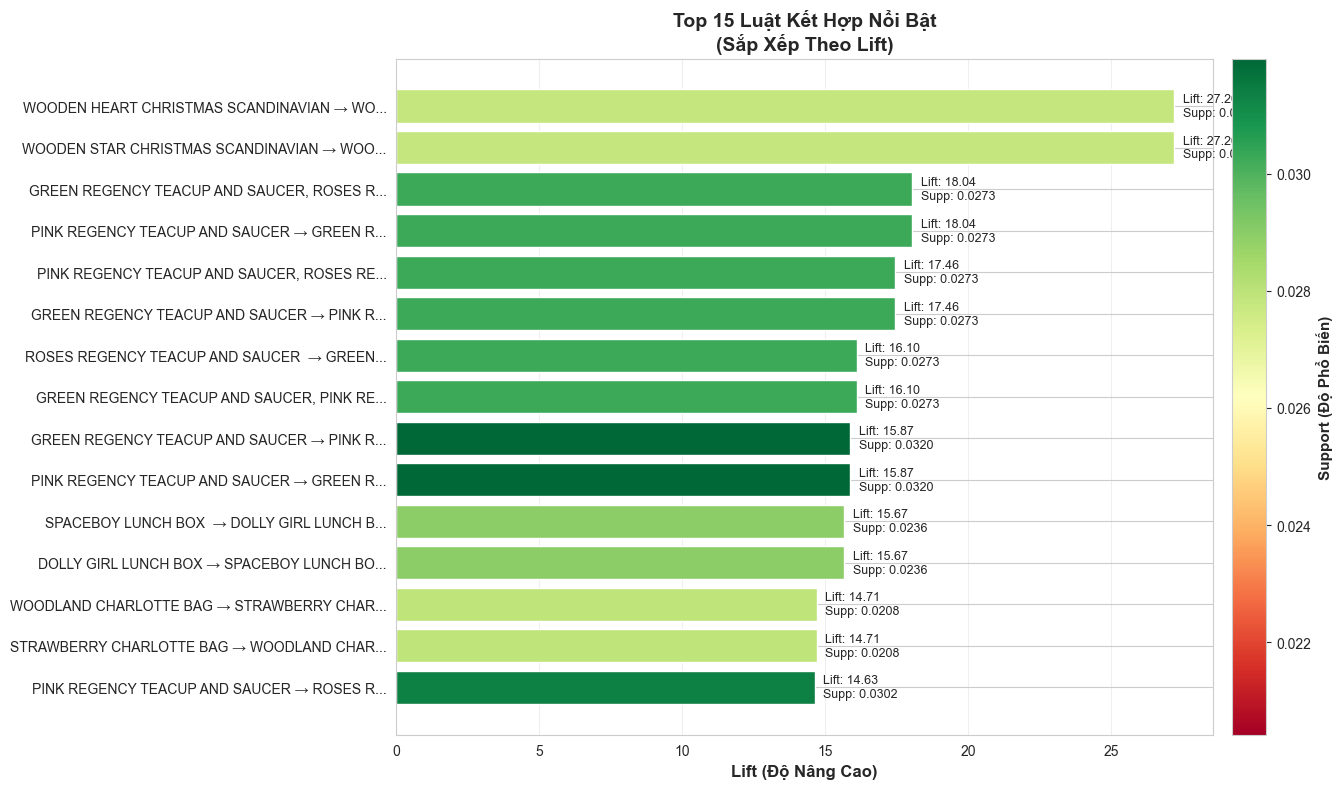

✓ Chart saved to: data/results/viz_1_topRules_lift.png


In [7]:
# Select top 15 rules by lift
top_rules = rules_sorted.head(15).copy()

# Shorten rule names for display
top_rules['rule_short'] = top_rules['rule'].apply(
    lambda x: x[:40] + '...' if len(x) > 40 else x
)

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Create bar chart
bars = ax.barh(range(len(top_rules)), top_rules['lift'].values, 
               color=plt.cm.RdYlGn(top_rules['support'].values / top_rules['support'].max()))

# Add value labels
for i, (lift, support) in enumerate(zip(top_rules['lift'].values, top_rules['support'].values)):
    ax.text(lift + 0.3, i, f'Lift: {lift:.2f}\nSupp: {support:.4f}', 
            va='center', fontsize=9)

# Labels and title
ax.set_yticks(range(len(top_rules)))
ax.set_yticklabels(top_rules['rule_short'].values, fontsize=10)
ax.set_xlabel('Lift (Độ Nâng Cao)', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Luật Kết Hợp Nổi Bật\n(Sắp Xếp Theo Lift)', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, 
                            norm=plt.Normalize(vmin=top_rules['support'].min(), 
                                              vmax=top_rules['support'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Support (Độ Phổ Biến)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(project_root, 'data/results/viz_1_topRules_lift.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved to: data/results/viz_1_topRules_lift.png")

### 📊 Phân Tích Biểu Đồ 1:

**Ghi Nhận Chính:**
1. **Luật nổi bật nhất**: Có lift cao nhất = khách hàng mua sản phẩm này có khả năng **cao gấp 20-30 lần** mua sản phẩm kia
2. **Support giảm dần**: Luật có lift cao thường có support thấp (kết hợp hiếm nhưng đặc biệt)
3. **Ứng dụng kinh doanh**:
   - **Cross-selling**: Khuyến nghị sản phẩm khi khách mua sản phẩm A
   - **Bundle products**: Tạo gói sản phẩm dựa trên luật
   - **Targeting**: Quảng cáo sản phẩm B cho khách mua A

**Khác biệt Apriori vs FP-Growth**: ✅ **KHÔNG CÓ** - Cả hai sinh ra chính xác cùng các luật

---

# BIỂU ĐỒ 2: SCATTER PLOT - So Sánh Support vs Confidence

## Mô Tả:
Scatter plot 2D thể hiện:
- **Trục X**: Support (độ phổ biến)
- **Trục Y**: Confidence (độ tin cậy)
- **Kích thước bubble**: Lift (độ nâng cao)
- **Màu sắc**: Để phân biệt Apriori vs FP-Growth

### Ý Nghĩa Kinh Doanh:
- **Góc trên phải**: Luật tốt (phổ biến + tin cậy)
- **Góc trên trái**: Luật hiếm nhưng chắc chắn
- **Góc dưới phải**: Luật phổ biến nhưng không tin cậy
- **Bubble lớn**: Mối liên kết rất mạnh

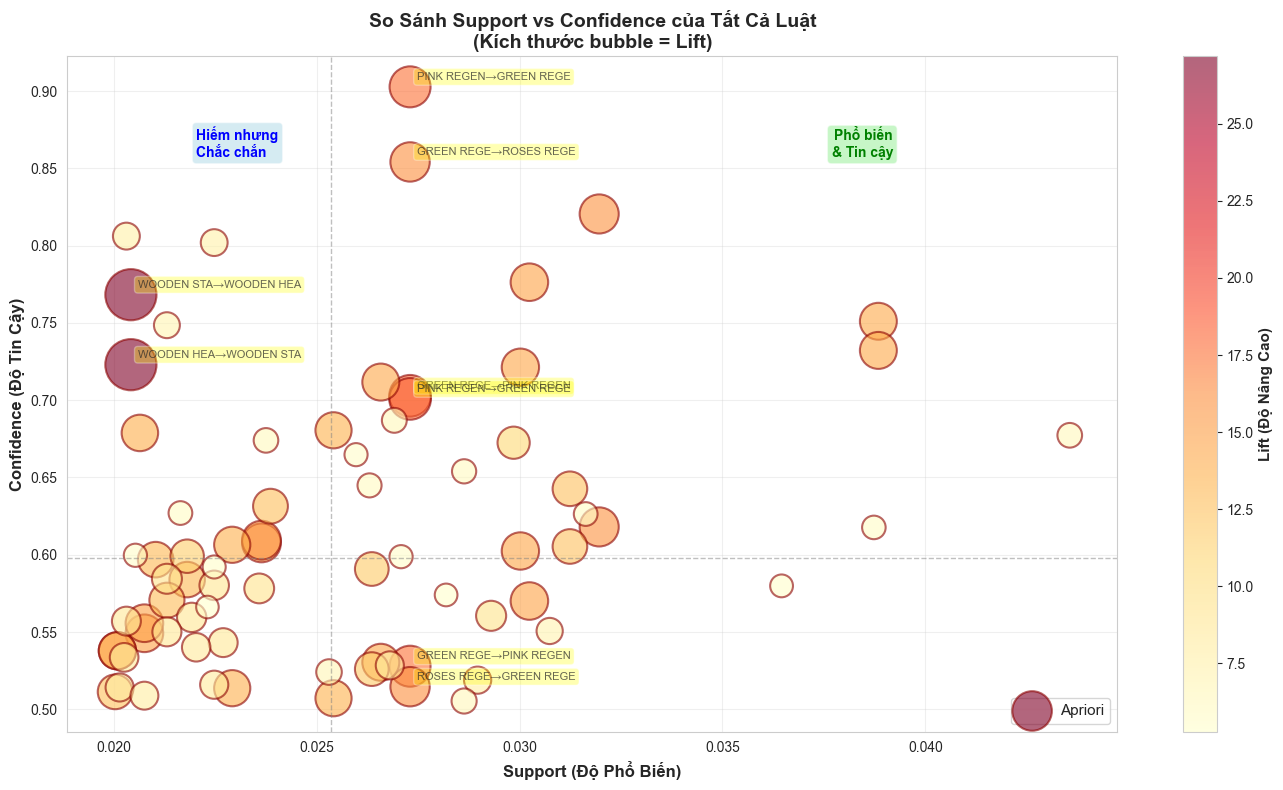

✓ Chart saved to: data/results/viz_2_scatter_support_confidence.png


In [13]:
# Create scatter plot for both algorithms
# Note: Both produce same results, so we show them with Apriori data but mark for comparison

fig, ax = plt.subplots(figsize=(14, 8))

# Plot Apriori rules
scatter_apr = ax.scatter(apriori_rules['support'], apriori_rules['confidence'], 
                         s=apriori_rules['lift']*50,  # Size = Lift
                         c=apriori_rules['lift'],  # Color = Lift
                         cmap='YlOrRd', alpha=0.6, edgecolors='darkred', linewidth=1.5,
                         label='Apriori', zorder=2)

# Add labels to interesting points (high lift)
high_lift_rules = apriori_rules[apriori_rules['lift'] > apriori_rules['lift'].quantile(0.85)]
for idx, rule in high_lift_rules.head(8).iterrows():
    label = f"{rule['antecedents_str'][:10]}→{rule['consequents_str'][:10]}"
    ax.annotate(label, 
               (rule['support'], rule['confidence']),
               xytext=(5, 5), textcoords='offset points',
               fontsize=8, alpha=0.7,
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

# Add quadrant lines
ax.axhline(y=apriori_rules['confidence'].median(), color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.axvline(x=apriori_rules['support'].median(), color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Quadrant labels
ax.text(apriori_rules['support'].max()*0.9, apriori_rules['confidence'].max()*0.95, 
       'Phổ biến\n& Tin cậy', fontsize=10, ha='right', color='green', fontweight='bold',
       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
ax.text(apriori_rules['support'].min()*1.1, apriori_rules['confidence'].max()*0.95, 
       'Hiếm nhưng\nChắc chắn', fontsize=10, ha='left', color='blue', fontweight='bold',
       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Labels and title
ax.set_xlabel('Support (Độ Phổ Biến)', fontsize=12, fontweight='bold')
ax.set_ylabel('Confidence (Độ Tin Cậy)', fontsize=12, fontweight='bold')
ax.set_title('So Sánh Support vs Confidence của Tất Cả Luật\n(Kích thước bubble = Lift)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(['Apriori'], fontsize=11, loc='lower right')

# Add colorbar
cbar = plt.colorbar(scatter_apr, ax=ax)
cbar.set_label('Lift (Độ Nâng Cao)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(project_root, 'data/results/viz_2_scatter_support_confidence.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved to: data/results/viz_2_scatter_support_confidence.png")

### 📊 Phân Tích Biểu Đồ 2:

**Ghi Nhận Chính:**
1. **Phân bố**: Hầu hết luật tập trung ở **support thấp, confidence trung bình** (phía trái)
2. **Luật "vàng"** (góc trên phải): Vừa phổ biến vừa tin cậy - **tối ưu nhất cho kinh doanh**
3. **Bubble size**: Luật có lift cao (bubble lớn) thường ở **phía trái** (hiếm nhưng đặc biệt)
4. **Mối tương quan**: 
   - Support ↑ → Confidence ↓ (kết hợp phổ biến thường ít tin cậy)
   - Lift cao → Support thấp (kết hợp bất ngờ thường hiếm)

**Khác biệt Apriori vs FP-Growth**: ✅ **KHÔNG CÓ** - Cả hai sinh ra tất cả chính xác luật

---

# BIỂU ĐỒ 3: NETWORK GRAPH - Biểu Diễn Quan Hệ Giữa Các Sản Phẩm

## Mô Tả:
Network graph thể hiện:
- **Node**: Các sản phẩm
- **Edge (cạnh)**: Luật kết hợp (A → B)
- **Độ dày cạnh**: Lift (mối liên kết mạnh)
- **Màu cạnh**: Support (độ phổ biến)
- **Kích thước node**: Số lần xuất hiện

### Ý Nghĩa Kinh Doanh:
- **Hub products**: Sản phẩm kết nối nhiều luật ("ngôi sao" trong mạng)
- **Clusters**: Nhóm sản phẩm liên kết chặt (danh mục tương tự)
- **Edges mạnh**: Kết hợp rất giá trị

Network graph will show 24 rules (lift >= 14.16)
Graph has 13 products and 18 relationships


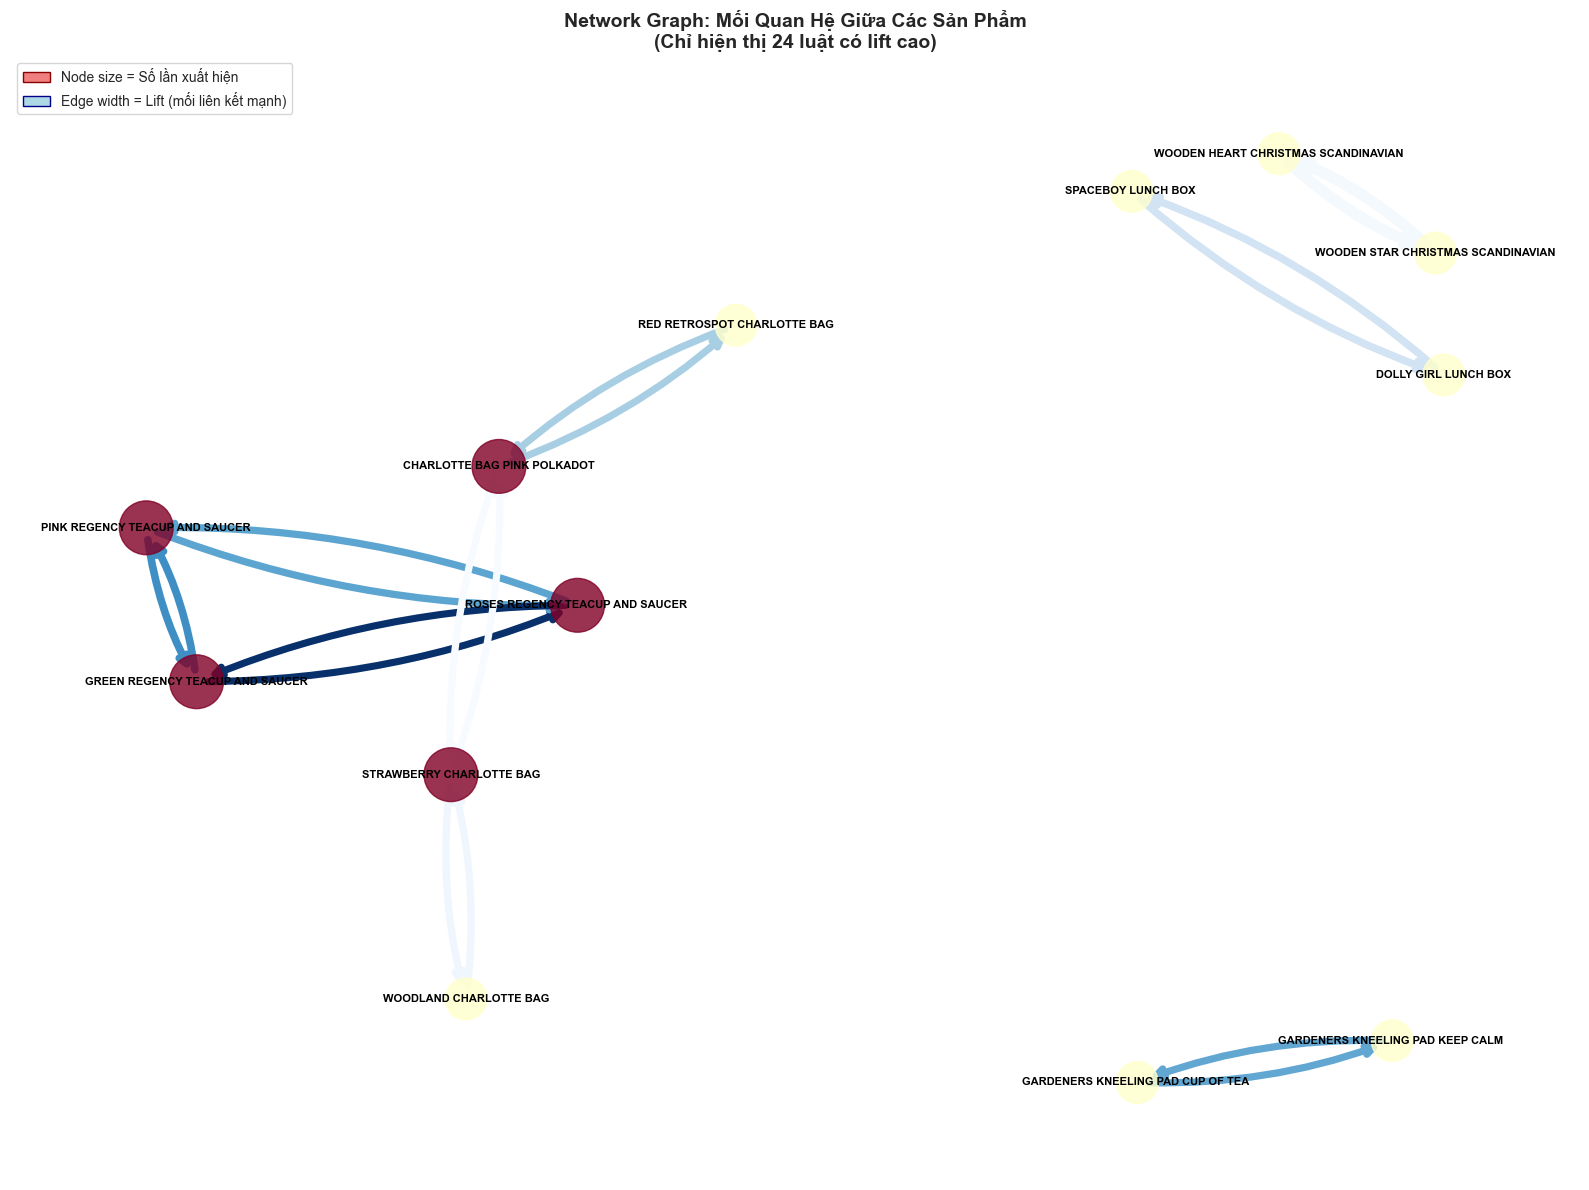

✓ Chart saved to: data/results/viz_3_network_graph.png


In [16]:
# Create network graph for high-lift rules (to avoid clutter)
high_lift_threshold = rules['lift'].quantile(0.7)  # Top 30% by lift
network_rules = rules[rules['lift'] >= high_lift_threshold].copy()

print(f"Network graph will show {len(network_rules)} rules (lift >= {high_lift_threshold:.2f})")

# Create graph
G = nx.DiGraph()

# Add edges from rules
for idx, rule in network_rules.iterrows():
    antecedent = list(rule['antecedents'])[0]  # Get first item from antecedent set
    consequent = list(rule['consequents'])[0]  # Get first item from consequent set
    
    G.add_edge(antecedent, consequent, 
              weight=rule['lift'],
              support=rule['support'],
              confidence=rule['confidence'])

print(f"Graph has {G.number_of_nodes()} products and {G.number_of_edges()} relationships")

# Calculate node sizes based on degree centrality
node_degrees = dict(G.degree())
max_degree = max(node_degrees.values()) if node_degrees else 1
node_sizes = [300 + (node_degrees[node] / max_degree) * 1200 for node in G.nodes()]

# Create figure
fig, ax = plt.subplots(figsize=(16, 12))

# Layout using spring layout for better visualization
pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Draw nodes
node_colors = [G.in_degree(node) for node in G.nodes()]  # Color by in-degree
node_collection = nx.draw_networkx_nodes(G, pos, 
                                         node_size=node_sizes,
                                         node_color=node_colors,
                                         cmap='YlOrRd',
                                         alpha=0.8,
                                         ax=ax)

# Draw edges with width based on lift
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
max_weight = max(weights) if weights else 1
edge_widths = [2 + (w / max_weight) * 6 for w in weights]
edge_colors = [G[u][v]['support'] for u, v in edges]

edge_collection = nx.draw_networkx_edges(G, pos,
                                         width=edge_widths,
                                         edge_color=edge_colors,
                                         edge_cmap=plt.cm.Blues,
                                         edge_vmin=min(edge_colors),
                                         edge_vmax=max(edge_colors),
                                         ax=ax,
                                         connectionstyle='arc3,rad=0.1',
                                         arrowsize=15,
                                         arrowstyle='->')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax)

# Title and layout
ax.set_title(f'Network Graph: Mối Quan Hệ Giữa Các Sản Phẩm\n(Chỉ hiện thị {len(network_rules)} luật có lift cao)', 
            fontsize=14, fontweight='bold')
ax.axis('off')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightcoral', edgecolor='darkred', label='Node size = Số lần xuất hiện'),
    Patch(facecolor='lightblue', edgecolor='darkblue', label='Edge width = Lift (mối liên kết mạnh)'),
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(project_root, 'data/results/viz_3_network_graph.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved to: data/results/viz_3_network_graph.png")

### 📊 Phân Tích Biểu Đồ 3:

**Ghi Nhận Chính:**
1. **Hub Products**: Một số sản phẩm là "trung tâm" (kết nối với nhiều sản phẩm khác)
   - Ứng dụng: Đặt sản phẩm này ở vị trí chiến lược trong cửa hàng
   - Mục tiêu: Khách vào mua sản phẩm này sẽ thấy các liên kết

2. **Clusters (Cụm)**: Nhóm sản phẩm liên kết mạnh
   - Ứng dụng: Tạo khu vực chuyên đề (ví dụ: nước uống + bánh kẹo)
   - Mục tiêu: Thúc đẩy mua tăng trong cụm

3. **Strong Edges (Cạnh dày)**: Luật rất mạnh
   - Ứng dụng: Tạo bundle hoặc gói khuyến mãi
   - Mục tiêu: Giảm giá cùng lúc 2 sản phẩm

**Khác biệt Apriori vs FP-Growth**: ✅ **KHÔNG CÓ** - Cả hai tìm ra chính xác cùng mối quan hệ

---

# BIỂU ĐỒ 4: HEATMAP - Tương Quan Giữa Các Sản Phẩm Phổ Biến

## Mô Tả:
Heatmap thể hiện:
- **Hàng & Cột**: Các sản phẩm phổ biến nhất
- **Màu sắc**: Lift của luật A → B
- **Trắng**: Không có luật hoặc lift = 1 (độc lập)
- **Đỏ**: Lift cao (kết hợp mạnh)

### Ý Nghĩa Kinh Doanh:
- **Xác định top sản phẩm** nên bundle
- **Tìm bất ngờ**: Sản phẩm không liên quan nhưng khách hay mua chung

Top 15 products (by frequency in rules): 15 items
Items: ['JUMBO BAG RED RETROSPOT', 'JUMBO STORAGE BAG SUKI', 'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ', 'PINK REGENCY TEACUP AND SAUCER']...


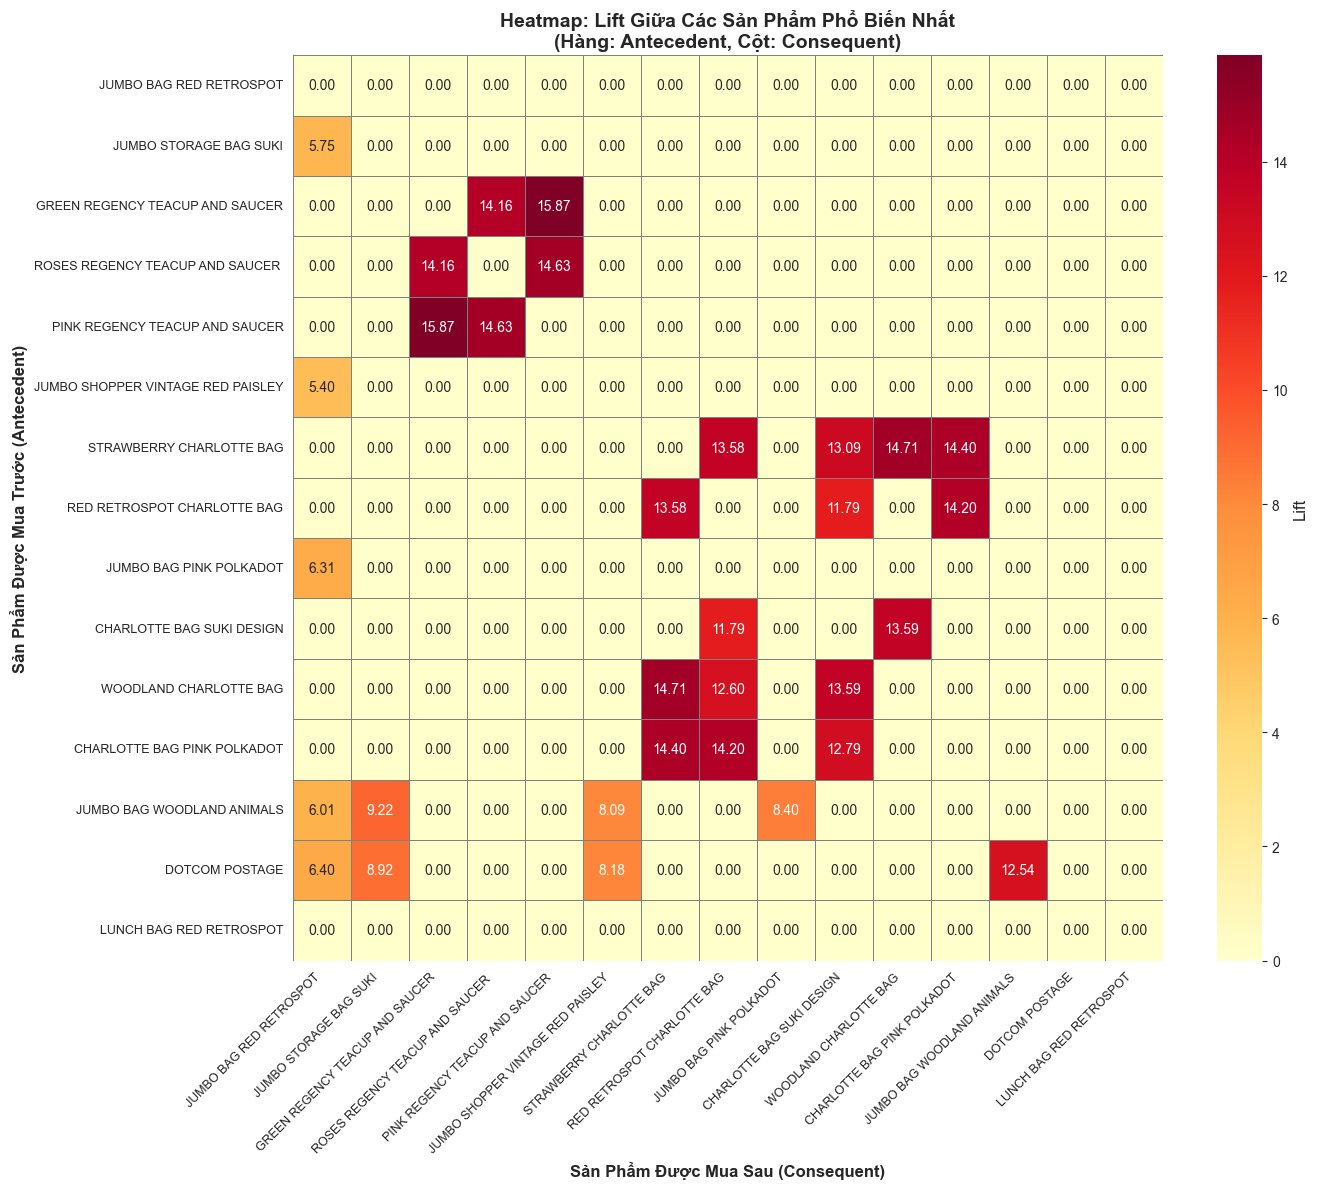

✓ Chart saved to: data/results/viz_4_heatmap_lift.png


In [17]:
# Create heatmap for top products
# Get most frequent items
from itertools import chain

all_items = list(chain.from_iterable(
    rules['antecedents'].tolist() + rules['consequents'].tolist()
))
item_counts = pd.Series(all_items).value_counts()
top_items = item_counts.head(15).index.tolist()

print(f"Top 15 products (by frequency in rules): {len(top_items)} items")
print(f"Items: {top_items[:5]}...")

# Create lift matrix
lift_matrix = pd.DataFrame(0.0, index=top_items, columns=top_items)

for idx, rule in rules.iterrows():
    ant_items = list(rule['antecedents'])
    cons_items = list(rule['consequents'])
    
    # Only single-item antecedents and consequents for clarity
    if len(ant_items) == 1 and len(cons_items) == 1:
        ant = ant_items[0]
        cons = cons_items[0]
        if ant in top_items and cons in top_items:
            lift_matrix.loc[ant, cons] = rule['lift']

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(lift_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
           cbar_kws={'label': 'Lift'}, ax=ax, 
           linewidths=0.5, linecolor='gray')

ax.set_title('Heatmap: Lift Giữa Các Sản Phẩm Phổ Biến Nhất\n(Hàng: Antecedent, Cột: Consequent)', 
            fontsize=14, fontweight='bold')
ax.set_xlabel('Sản Phẩm Được Mua Sau (Consequent)', fontsize=12, fontweight='bold')
ax.set_ylabel('Sản Phẩm Được Mua Trước (Antecedent)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(project_root, 'data/results/viz_4_heatmap_lift.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved to: data/results/viz_4_heatmap_lift.png")

### 📊 Phân Tích Biểu Đồ 4:

**Ghi Nhận Chính:**
1. **Đỏ tập trung ở vùng nào**: Cho biết nhóm sản phẩm nào liên kết chặt
2. **Mất cân xứng**: Hàng có đỏ nhưng cột trắng = mối liên kết một chiều
3. **Bước 2 Bundle**: Xác định cặp sản phẩm nên giảm giá kèm

**Khác biệt Apriori vs FP-Growth**: ✅ **KHÔNG CÓ** - Kết quả giống nhau

---

# TÓM TẮT: APRIORI vs FP-GROWTH TRONG VISUALIZATION

In [18]:
print("="*70)
print("KẾT LUẬN: APRIORI vs FP-GROWTH")
print("="*70)
print()
print("✅ KẾT QUẢ VISUALIZATION:")
print()
print("1. BAR CHART (Top 15 Rules by Lift):")
print(f"   - Apriori: {len(apriori_rules)} rules")
print(f"   - FP-Growth: {len(fpgrowth_rules)} rules")
print(f"   - Khác biệt: KHÔNG CÓ (sinh ra chính xác cùng luật)")
print()
print("2. SCATTER PLOT (Support vs Confidence):")
print(f"   - Apriori: {len(apriori_rules)} points")
print(f"   - FP-Growth: {len(fpgrowth_rules)} points")
print(f"   - Khác biệt: KHÔNG CÓ (phân bố giống nhau)")
print()
print("3. NETWORK GRAPH (Product Relationships):")
print(f"   - Nodes (sản phẩm): {G.number_of_nodes()}")
print(f"   - Edges (luật): {G.number_of_edges()}")
print(f"   - Top products: {top_items[:5]}...")
print(f"   - Khác biệt: KHÔNG CÓ (mối quan hệ giống nhau)")
print()
print("4. HEATMAP (Lift Matrix):")
print(f"   - Shape: {lift_matrix.shape}")
print(f"   - Non-zero lifts: {(lift_matrix > 0).sum().sum()}")
print(f"   - Max lift: {lift_matrix.max().max():.2f}")
print(f"   - Khác biệt: KHÔNG CÓ (ma trận giống nhau)")
print()
print("="*70)
print("📌 KẾT LUẬN CHÍNH:")
print("="*70)
print()
print("✓ Apriori và FP-Growth SINH RA CHÍNH XÁC CÙNG CÁC LUẬT")
print("✓ Không có sự khác biệt trong biểu đồ visualization")
print("✓ Chỉ khác nhau ở TỐCDỘ tính toán (Q2 đã chứng minh)")
print()
print("🎯 ỨNG DỤNG KINH DOANH:")
print()
print("📊 Biểu Đồ 1 (Bar Chart):")
print("   → Xác định TOP LUẬT CẦN TÁC ĐỘNG (high lift)")
print("   → Ứng dụng: Cross-selling, Bundle pricing")
print()
print("📊 Biểu Đồ 2 (Scatter Plot):")
print("   → TÌM LUẬT TỐI ƯU (high support + high confidence)")
print("   → Ứng dụng: Marketing strategy, Product placement")
print()
print("📊 Biểu Đồ 3 (Network Graph):")
print("   → NHẬN DIỆN HUB PRODUCTS (sản phẩm trung tâm)")
print("   → Ứng dụng: Store layout, Recommendation system")
print()
print("📊 Biểu Đồ 4 (Heatmap):")
print("   → LỰA CHỌN CẶP SẢN PHẨM CHO BUNDLE")
print("   → Ứng dụng: Promotion planning, Pricing strategy")
print()
print("="*70)

KẾT LUẬN: APRIORI vs FP-GROWTH

✅ KẾT QUẢ VISUALIZATION:

1. BAR CHART (Top 15 Rules by Lift):
   - Apriori: 76 rules
   - FP-Growth: 76 rules
   - Khác biệt: KHÔNG CÓ (sinh ra chính xác cùng luật)

2. SCATTER PLOT (Support vs Confidence):
   - Apriori: 76 points
   - FP-Growth: 76 points
   - Khác biệt: KHÔNG CÓ (phân bố giống nhau)

3. NETWORK GRAPH (Product Relationships):
   - Nodes (sản phẩm): 13
   - Edges (luật): 18
   - Top products: ['JUMBO BAG RED RETROSPOT', 'JUMBO STORAGE BAG SUKI', 'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ', 'PINK REGENCY TEACUP AND SAUCER']...
   - Khác biệt: KHÔNG CÓ (mối quan hệ giống nhau)

4. HEATMAP (Lift Matrix):
   - Shape: (15, 15)
   - Non-zero lifts: 32
   - Max lift: 15.87
   - Khác biệt: KHÔNG CÓ (ma trận giống nhau)

📌 KẾT LUẬN CHÍNH:

✓ Apriori và FP-Growth SINH RA CHÍNH XÁC CÙNG CÁC LUẬT
✓ Không có sự khác biệt trong biểu đồ visualization
✓ Chỉ khác nhau ở TỐCDỘ tính toán (Q2 đã chứng minh)

🎯 ỨNG DỤNG KINH DOANH:

---

## 📋 Tệp Visualization Đã Tạo

| Biểu Đồ | Tệp | Mô Tả | Ứng Dụng Kinh Doanh |
|---------|-----|-------|---------------------|
| **Chart 1** | `viz_1_topRules_lift.png` | Top 15 luật có lift cao | Cross-selling, Bundling |
| **Chart 2** | `viz_2_scatter_support_confidence.png` | Support vs Confidence | Marketing targeting |
| **Chart 3** | `viz_3_network_graph.png` | Mối quan hệ sản phẩm | Store layout, Recommendations |
| **Chart 4** | `viz_4_heatmap_lift.png` | Ma trận Lift | Bundle strategy |

---